In [1]:
# 必要ライブラリの宣言
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Numpyを使ったコーディングテクニック

# w = (1, 2)
w = np.array([1, 2])
print(w)
print(w.shape)

[1 2]
(2,)


In [13]:
# x = (3, 4)
x = np.array([3, 4])
print(x)
print(x.shape)

[3 4]
(2,)


In [14]:
# (3.7.2)式の内積の実装例
# y = 1*3 + 2*4 = 11
y = x @ w
print(y)

11


In [21]:
# *だと要素ごとの掛け算になる
y = x * w
print(y)
# 従ってsumを使ってもいいんだな
y1 = y.sum()
print(y1)

[3 8]
11


In [22]:
# X は3行2列の行列
X = np.array([[1,2],[3,4],[5,6]])
print(X)
print(X.shape)

[[1 2]
 [3 4]
 [5 6]]
(3, 2)


In [23]:
Y = X @ w
print(Y)
print(Y.shape)

[ 5 11 17]
(3,)


In [29]:
# *だと要素ごとの掛け算になる
Y = X * w
print(Y)
print(Y.shape)
Y0 = Y.sum(axis=0)
Y1 = Y.sum(axis=1)
print(Y0)
print(Y1)

[[ 1  4]
 [ 3  8]
 [ 5 12]]
(3, 2)
[ 9 24]
[ 5 11 17]


In [31]:
# 転置行列の作成
XT = X . T
print(X)
print(XT)

[[1 2]
 [3 4]
 [5 6]]
[[1 3 5]
 [2 4 6]]


In [32]:
yd = np.array([1, 2, 3])
print(yd)

[1 2 3]


In [33]:
# 勾配値の計算(の一部)
grad = XT @ yd
print(grad)

[22 28]


In [34]:
# Numpyを使ったコーディングテクニック（ここまで）

In [94]:
from sklearn.datasets import load_boston
# 学習用データ準備
boston = load_boston()
x_org, yt = boston.data, boston.target
feature_names = boston.feature_names
print('元データ', x_org.shape, yt.shape)
print('項目名: ', feature_names)

元データ (506, 13) (506,)
項目名:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [95]:
print(x_org)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [96]:
print(yt)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [97]:
# データ絞り込み (項目 RMのみ)
x_data = x_org[:,feature_names == 'RM']
print('絞り込み後', x_data.shape)

print(x_data)

# ダミー変数を追加
x = np.insert(x_data, 0, 1.0, axis=1)
print('ダミー変数追加後', x.shape)

print(x)

絞り込み後 (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.

In [87]:
# 入力データxの表示 (ダミー変数を含む)
print(x.shape)
print(x[:5,:])

(506, 2)
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]


In [88]:
# 正解データ yの表示
print(yt[:5])

[24.  21.6 34.7 33.4 36.2]


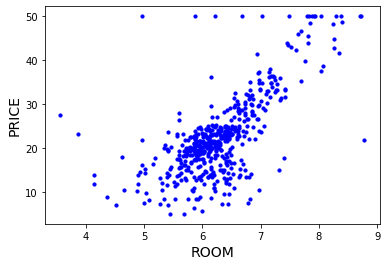

In [98]:
# 散布図の表示
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.show()

In [99]:
# 予測関数 (1, x)の値から予測値ypを計算する
def pred(x, w):
    return(x @ w)

In [100]:
# 初期化処理

# データ系列総数
M  = x.shape[0]
# print(M)

# 入力データ次元数(ダミー変数を含む)
D = x.shape[1]
# print(D)

# 繰り返し回数
iters = 50000

# 学習率
alpha = 0.01

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)
# print(w)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))
# print(history)

In [80]:
# 動作チェック用
yp = pred(x, w)
print(yp)
print(yp.shape)

[7.575 7.421 8.185 7.998 8.147 7.43  7.012 7.172 6.631 7.004 7.377 7.009
 6.889 6.949 7.096 6.834 6.935 6.99  6.456 6.727 6.57  6.965 7.142 6.813
 6.924 6.599 6.813 7.047 7.495 7.674 6.713 7.072 6.95  6.701 7.096 6.933
 6.841 6.85  6.966 7.595 8.024 7.77  7.169 7.211 7.069 6.682 6.786 7.03
 6.399 6.602 6.963 7.115 7.511 6.998 6.888 8.249 7.383 7.816 7.145 6.927
 6.741 6.966 7.456 7.762 8.104 7.29  6.787 6.878 6.594 6.885 7.417 6.961
 7.065 7.245 7.273 7.286 7.279 7.14  7.232 6.874 7.727 7.619 7.302 7.167
 7.389 7.63  7.015 7.121 8.007 8.079 7.417 7.405 7.442 7.211 7.249 7.625
 7.163 9.069 8.82  8.416 7.727 7.781 7.405 7.137 7.167 6.851 6.836 7.127
 7.474 7.229 7.195 7.715 6.913 7.092 7.254 6.928 7.176 7.021 6.872 6.731
 6.87  7.004 6.961 6.856 6.879 6.986 6.613 6.693 7.431 6.637 7.458 7.326
 7.372 6.822 6.757 7.335 6.942 7.454 6.857 7.151 7.174 6.019 6.403 6.468
 5.903 7.13  6.628 5.926 6.186 6.597 7.122 6.404 6.012 6.709 7.129 7.152
 6.272 7.943 7.066 7.51  7.25  8.489 8.802 9.375 6.8

In [81]:
# 動作チェック用
yd = yp - yt
print(yd)
print(yd.shape)

[-16.425 -14.179 -26.515 -25.402 -28.053 -21.27  -15.888 -19.928  -9.869
 -11.896  -7.623 -11.891 -14.811 -13.451 -11.104 -13.066 -16.165 -10.51
 -13.744 -11.473  -7.03  -12.635  -8.058  -7.687  -8.676  -7.301  -9.787
  -7.753 -10.905 -13.326  -5.987  -7.428  -6.25   -6.399  -6.404 -11.967
 -13.159 -14.15  -17.734 -23.205 -26.876 -18.83  -18.131 -17.489 -14.131
 -12.618 -13.214  -9.57   -8.001 -12.798 -12.737 -13.385 -17.489 -16.402
 -12.012 -27.151 -17.317 -23.784 -16.155 -12.673 -11.959  -9.034 -14.744
 -17.238 -24.896 -16.21  -12.613 -15.122 -10.806 -14.015 -16.783 -14.739
 -15.735 -16.155 -16.827 -14.114 -12.721 -13.66  -13.968 -13.426 -20.273
 -16.281 -17.498 -15.733 -16.511 -18.97  -15.485 -15.079 -15.593 -20.621
 -15.183 -14.595 -15.458 -17.789 -13.351 -20.775 -14.237 -29.631 -34.98
 -24.784 -19.773 -18.719 -11.195 -12.163 -12.933 -12.649 -12.664 -13.273
 -12.326 -12.171 -14.505 -15.085 -11.887 -11.608 -11.246 -11.372 -14.024
 -12.179 -13.528 -12.569 -15.13  -13.296 -13.539 -10.

In [82]:
# 動作チェック用
print(x.T)
print(x.T.shape)
print(yd.shape)
print(x.T @ yd)
print((x.T @ yd).shape)
print(yd.sum())          # これはx.T @ yd[0]と同じになるはず
print((x.T @ yd)[0])

[[1.    1.    1.    ... 1.    1.    1.   ]
 [6.575 6.421 7.185 ... 6.976 6.794 6.03 ]]
(2, 506)
(506,)
[ -7715.575    -50509.454353]
(2,)
-7715.575
-7715.574999999996


In [92]:
# 動作チェック用
# 繰り返しループ
for k in range(50000):
    
    if (k % 100 == 0):　　　　　# wの値がループを進めるごとに変化していく様子がわかる
        print(w)
    
    # 予測値の計算 (7.8.1)
    yp = pred(x, w)
    
    # 誤差の計算 (7.8.2)
    yd = yp - yt
    
    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x.T @ yd) / M

[1. 1.]
[0.95177028 3.50208851]
[0.52599961 3.56902182]
[0.1053179  3.63515512]
[-0.31033569  3.70049797]
[-0.72102125  3.76505982]
[-1.12679815  3.82885001]
[-1.52772508  3.89187775]
[-1.92385999  3.95415217]
[-2.31526017  4.01568226]
[-2.7019822   4.07647693]
[-3.084082    4.13654495]
[-3.46161482  4.19589503]
[-3.83463524  4.25453573]
[-4.2031972   4.31247553]
[-4.56735398  4.36972283]
[-4.92715824  4.42628588]
[-5.282662    4.48217287]
[-5.63391665  4.53739189]
[-5.980973   4.5919509]
[-6.32388121  4.64585781]
[-6.66269087  4.69912041]
[-6.99745097  4.75174639]
[-7.3282099   4.80374337]
[-7.65501549  4.85511887]
[-7.97791499  4.90588031]
[-8.29695509  4.95603503]
[-8.61218191  5.00559028]
[-8.92364104  5.05455324]
[-9.23137751  5.10293097]
[-9.53543581  5.15073048]
[-9.8358599   5.19795867]
[-10.13269322   5.24462237]
[-10.42597869   5.29072833]
[-10.71575872   5.33628322]
[-11.0020752    5.38129362]
[-11.28496953   5.42576605]
[-11.56448261   5.46970692]
[-11.84065486   5.5131226 

[-34.2283833    9.03258701]
[-34.23366907   9.03341796]
[-34.23889166   9.03423898]
[-34.24405183   9.03505018]
[-34.24915033   9.03585169]
[-34.25418788   9.03664362]
[-34.25916522   9.03742608]
[-34.26408308   9.03819919]
[-34.26894215   9.03896307]
[-34.27374315   9.03971781]
[-34.27848676   9.04046353]
[-34.28317368   9.04120033]
[-34.28780458   9.04192833]
[-34.29238012   9.04264763]
[-34.29690098   9.04335833]
[-34.3013678    9.04406054]
[-34.30578124   9.04475436]
[-34.31014192   9.04543988]
[-34.31445048   9.04611721]
[-34.31870755   9.04678644]
[-34.32291373   9.04744767]
[-34.32706964   9.048101  ]
[-34.33117588   9.04874652]
[-34.33523304   9.04938433]
[-34.33924171   9.05001451]
[-34.34320246   9.05063716]
[-34.34711587   9.05125237]
[-34.35098251   9.05186023]
[-34.35480293   9.05246081]
[-34.35857769   9.05305423]
[-34.36230733   9.05364055]
[-34.3659924    9.05421986]
[-34.36963342   9.05479224]
[-34.37323092   9.05535779]
[-34.37678542   9.05591657]
[-34.38029744   9.05

In [101]:
# 繰り返しループ
for k in range(iters):
    
    # 予測値の計算 (7.8.1)
    yp = pred(x, w)
    
    # 誤差の計算 (7.8.2)
    yd = yp - yt
    
    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x.T @ yd) / M
    
    # 学習曲線描画用データの計算、保存
    if ( k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))  # これの意味は下で調べている
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss))   

iter = 0  loss = 154.224934
iter = 100  loss = 29.617518
iter = 200  loss = 29.431766
iter = 300  loss = 29.250428
iter = 400  loss = 29.073399
iter = 500  loss = 28.900577
iter = 600  loss = 28.731861
iter = 700  loss = 28.567154
iter = 800  loss = 28.406360
iter = 900  loss = 28.249388
iter = 1000  loss = 28.096145
iter = 1100  loss = 27.946544
iter = 1200  loss = 27.800498
iter = 1300  loss = 27.657922
iter = 1400  loss = 27.518733
iter = 1500  loss = 27.382852
iter = 1600  loss = 27.250200
iter = 1700  loss = 27.120700
iter = 1800  loss = 26.994277
iter = 1900  loss = 26.870858
iter = 2000  loss = 26.750372
iter = 2100  loss = 26.632749
iter = 2200  loss = 26.517921
iter = 2300  loss = 26.405821
iter = 2400  loss = 26.296385
iter = 2500  loss = 26.189549
iter = 2600  loss = 26.085252
iter = 2700  loss = 25.983433
iter = 2800  loss = 25.884034
iter = 2900  loss = 25.786997
iter = 3000  loss = 25.692265
iter = 3100  loss = 25.599784
iter = 3200  loss = 25.509501
iter = 3300  loss = 2

iter = 36700  loss = 21.801452
iter = 36800  loss = 21.801424
iter = 36900  loss = 21.801397
iter = 37000  loss = 21.801370
iter = 37100  loss = 21.801344
iter = 37200  loss = 21.801319
iter = 37300  loss = 21.801294
iter = 37400  loss = 21.801270
iter = 37500  loss = 21.801246
iter = 37600  loss = 21.801223
iter = 37700  loss = 21.801201
iter = 37800  loss = 21.801179
iter = 37900  loss = 21.801157
iter = 38000  loss = 21.801136
iter = 38100  loss = 21.801116
iter = 38200  loss = 21.801096
iter = 38300  loss = 21.801076
iter = 38400  loss = 21.801057
iter = 38500  loss = 21.801039
iter = 38600  loss = 21.801021
iter = 38700  loss = 21.801003
iter = 38800  loss = 21.800986
iter = 38900  loss = 21.800969
iter = 39000  loss = 21.800952
iter = 39100  loss = 21.800936
iter = 39200  loss = 21.800921
iter = 39300  loss = 21.800905
iter = 39400  loss = 21.800890
iter = 39500  loss = 21.800876
iter = 39600  loss = 21.800861
iter = 39700  loss = 21.800848
iter = 39800  loss = 21.800834
iter = 3

In [104]:
# 最終的な損失関数初期値、最終値
print('損失関数初期値: %f' % history[0,1])
print('損失関数最終値: %f' % history[-1,1])

損失関数初期値: 154.224934
損失関数最終値: 21.800325


In [112]:
# 下記直線描画用の座標値計算
xall = x[:,1].ravel()  # ravelは多次元のリストを1次元のリストにして返す
# print(xall)
xl = np.array([[1, xall.min()],[1, xall.max()]])
print(xl)
yl = pred(xl, w)
print(yl)

[[1.    3.561]
 [1.    8.78 ]]
[-2.21914767 45.21232425]


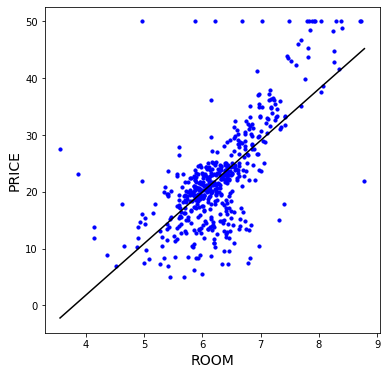

In [113]:
# 散布図と回帰直線の描画
plt.figure(figsize=(6,6))
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.plot(xl[:,1], yl, c='k')
plt.show()

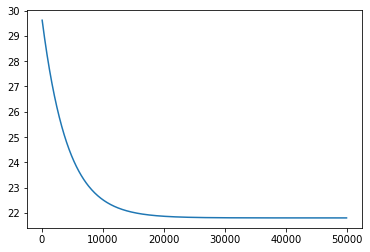

In [114]:
# 学習曲線の表示 (最初の1個分を除く)
plt.plot(history[1:,0], history[1:,1])
plt.show()

In [191]:
# Numpyのreshape, hstackとvstackの勉強

a_1d = np.arange(3)
print(a_1d)
print(a_1d.shape)
print('ndim = %d' % a_1d.ndim)
a_2d = np.arange(12).reshape((3, 4))
print(a_2d)
print(a_2d.shape)
print('ndim = %d' % a_2d.ndim)
# 4つの要素を含む配列が3つできる
a_2d2 = np.arange(12).reshape((4, 3))
print(a_2d2)
print(a_2d2.shape)
# 3つの要素を含む配列が4つできる
a_3d = np.arange(24).reshape((2, 3, 4))
print(a_3d)
print(a_3d.shape)
print('ndim = %d' % a_3d.ndim)
print(a_3d.shape[0])
print(a_3d.shape[1])
print(a_3d.shape[2])
print('len = %d' % len(a_3d))

[0 1 2]
(3,)
ndim = 1
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
(3, 4)
ndim = 2
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
(4, 3)
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
(2, 3, 4)
ndim = 3
2
3
4
len = 2


In [149]:
a = np.arange(12)
b = np.arange(2)
print(a)
print(a.shape)
print(b)
print(b.shape)
c = np.hstack((a, b))
print(c)
print(c.shape)
d = np.hstack((b, a))
print(d)
print(d.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
(12,)
[0 1]
(2,)
[ 0  1  2  3  4  5  6  7  8  9 10 11  0  1]
(14,)
[ 0  1  0  1  2  3  4  5  6  7  8  9 10 11]
(14,)


In [192]:
e = np.array([[0,1],[1,2],[2,3]])
print(e)
print(e.shape)
print('ndim = %d' % e.ndim)
print('len = %d' % len(e))

[[0 1]
 [1 2]
 [2 3]]
(3, 2)
ndim = 2
len = 3


In [155]:
f = np.arange(2).reshape(1, 2)
print(f)
print(f.shape)
# 2つの要素を含む配列が1つできる

[[0 1]]
(1, 2)


In [156]:
np.hstack((a, f))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [157]:
g = np.arange(5).reshape(1, 5)
print(g)
print(g.shape)
# 5つの要素を含む配列が1つできる

[[0 1 2 3 4]]
(1, 5)


In [158]:
np.hstack((f, g))

array([[0, 1, 0, 1, 2, 3, 4]])

In [193]:
h = np.arange(12).reshape(2, 2, 3)
print(h)
print(h.shape)
print('ndim = %d' % h.ndim)
# 3つの要素を含む配列2つを含む配列が2つできる

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
(2, 2, 3)
ndim = 3


In [194]:
i = np.arange(6).reshape(2, 1, 3)
print(i)
print(i.shape)
print('ndim = %d' % i.ndim)
# 3つの要素を含む配列1つを含む配列が2つできる

[[[0 1 2]]

 [[3 4 5]]]
(2, 1, 3)
ndim = 3


In [162]:
np.hstack((h,i))

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 0,  1,  2]],

       [[ 6,  7,  8],
        [ 9, 10, 11],
        [ 3,  4,  5]]])

In [195]:
j = np.arange(12).reshape(-1,1)
print(j)
print(j.shape)
print('ndim = %d' % j.ndim)
# 1つの要素を含む配列が(-1)=12つできる

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]
(12, 1)
ndim = 2


In [196]:
k = np.arange(2).reshape(-1,1)
print(k)
print(k.shape)
print('ndim = %d' % k.ndim)
# 1つの要素を含む配列が(-1)=2つできる

[[0]
 [1]]
(2, 1)
ndim = 2


In [197]:
l = np.vstack((j,k))
print(l)
print(l.shape)
print('ndim = %d' % l.ndim)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [ 0]
 [ 1]]
(14, 1)
ndim = 2


In [190]:
m = np.arange(2).reshape(1,2)
print(m)
print(m.shape)
print('ndim = %d' % m.ndim)

[[0 1]]
(1, 2)
ndim = 2


In [174]:
np.vstack((j,m)) 

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 2

In [175]:
n = np.arange(4).reshape(2,2)
print(n)

[[0 1]
 [2 3]]


In [176]:
np.vstack((m,n)) 

array([[0, 1],
       [0, 1],
       [2, 3]])

In [178]:
o = np.arange(24).reshape(4, 3, 2)
print(o)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]


In [179]:
p = np.arange(6).reshape(1, 3, 2)
print(p)

[[[0 1]
  [2 3]
  [4 5]]]


In [181]:
q = np.vstack((o, p))
print(q)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]

 [[ 0  1]
  [ 2  3]
  [ 4  5]]]


In [199]:
calc_list = np.zeros(2)
for k in range(10):
    square = k**2
    calc_list = np.vstack((calc_list, np.array([k, square])))
    print( "k = %d  k^2 = %d" % (k, square))   

k = 0  k^2 = 0
k = 1  k^2 = 1
k = 2  k^2 = 4
k = 3  k^2 = 9
k = 4  k^2 = 16
k = 5  k^2 = 25
k = 6  k^2 = 36
k = 7  k^2 = 49
k = 8  k^2 = 64
k = 9  k^2 = 81


In [200]:
# 列(LSTAT: 低所得者率)の追加
x_add = x_org[:,feature_names == 'LSTAT']
x2 = np.hstack((x, x_add))
print(x2.shape)

(506, 3)


In [201]:
# 入力データxの表示 (ダミーデータを含む)
print(x2[:5,:])

[[1.    6.575 4.98 ]
 [1.    6.421 9.14 ]
 [1.    7.185 4.03 ]
 [1.    6.998 2.94 ]
 [1.    7.147 5.33 ]]


In [204]:
# 初期化処理

# データ系列総数
M  = x2.shape[0]
#print(M)

# 入力データ次元数(ダミー変数を含む)
D = x2.shape[1]
#print(D)

# 繰り返し回数
iters = 50000

# 学習率
alpha = 0.01

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [205]:
# 繰り返しループ
for k in range(iters):
    
    # 予測値の計算 (7.8.1)
    yp = pred(x2, w)
    
    # 誤差の計算 (7.8.2)
    yd = yp - yt
    
    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x2.T @ yd) / M
    
    # 学習曲線描画用データの計算、保存
    if ( k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss))   

iter = 0  loss = 112.063982
iter = 100  loss = 3753823486849646657661191585792.000000
iter = 200  loss = 2655334090092121273125402130921363327346591043573060835737600.000000
iter = 300  loss = 1878297995285461085045523284196482247086583201277085616612002646578050704876245186403893248.000000
iter = 400  loss = 1328647635059370371481703736763320157491450137821164352493234234699501961915925811873201177774480485596734461998977253376.000000
iter = 500  loss = 939842635502889662770612459069204655322935013749983559305346547831066121187997098891801614859352058834834127179648062098892108735689096962423654449152.000000
iter = 600  loss = 664814474659069633326225154456281621437843401089919849984802605951952813450932070104832955931408232444704376327323598259772619705292304255008658261182054817148272715437536805126144.000000
iter = 700  loss = 4702683928354890122336859725898191832282143720139237825330730669746867864949239124735902657924806487243589542826018357625164953426808618327631873381924793161

/var/folders/83/5p_5c8c97tz9m464jrrqlzyh0000gn/T/ipykernel_13427/1786208956.py:16: RuntimeWarning: overflow encountered in square
  loss = np.mean(yd ** 2) / 2
/var/folders/83/5p_5c8c97tz9m464jrrqlzyh0000gn/T/ipykernel_13427/1786208956.py:11: RuntimeWarning: overflow encountered in matmul
  w = w - alpha * (x2.T @ yd) / M
/var/folders/83/5p_5c8c97tz9m464jrrqlzyh0000gn/T/ipykernel_13427/1786208956.py:11: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * (x2.T @ yd) / M



iter = 10800  loss = nan
iter = 10900  loss = nan
iter = 11000  loss = nan
iter = 11100  loss = nan
iter = 11200  loss = nan
iter = 11300  loss = nan
iter = 11400  loss = nan
iter = 11500  loss = nan
iter = 11600  loss = nan
iter = 11700  loss = nan
iter = 11800  loss = nan
iter = 11900  loss = nan
iter = 12000  loss = nan
iter = 12100  loss = nan
iter = 12200  loss = nan
iter = 12300  loss = nan
iter = 12400  loss = nan
iter = 12500  loss = nan
iter = 12600  loss = nan
iter = 12700  loss = nan
iter = 12800  loss = nan
iter = 12900  loss = nan
iter = 13000  loss = nan
iter = 13100  loss = nan
iter = 13200  loss = nan
iter = 13300  loss = nan
iter = 13400  loss = nan
iter = 13500  loss = nan
iter = 13600  loss = nan
iter = 13700  loss = nan
iter = 13800  loss = nan
iter = 13900  loss = nan
iter = 14000  loss = nan
iter = 14100  loss = nan
iter = 14200  loss = nan
iter = 14300  loss = nan
iter = 14400  loss = nan
iter = 14500  loss = nan
iter = 14600  loss = nan
iter = 14700  loss = nan

iter = 45500  loss = nan
iter = 45600  loss = nan
iter = 45700  loss = nan
iter = 45800  loss = nan
iter = 45900  loss = nan
iter = 46000  loss = nan
iter = 46100  loss = nan
iter = 46200  loss = nan
iter = 46300  loss = nan
iter = 46400  loss = nan
iter = 46500  loss = nan
iter = 46600  loss = nan
iter = 46700  loss = nan
iter = 46800  loss = nan
iter = 46900  loss = nan
iter = 47000  loss = nan
iter = 47100  loss = nan
iter = 47200  loss = nan
iter = 47300  loss = nan
iter = 47400  loss = nan
iter = 47500  loss = nan
iter = 47600  loss = nan
iter = 47700  loss = nan
iter = 47800  loss = nan
iter = 47900  loss = nan
iter = 48000  loss = nan
iter = 48100  loss = nan
iter = 48200  loss = nan
iter = 48300  loss = nan
iter = 48400  loss = nan
iter = 48500  loss = nan
iter = 48600  loss = nan
iter = 48700  loss = nan
iter = 48800  loss = nan
iter = 48900  loss = nan
iter = 49000  loss = nan
iter = 49100  loss = nan
iter = 49200  loss = nan
iter = 49300  loss = nan
iter = 49400  loss = nan


In [207]:
# 初期化処理 (パラメータを適切な値に変更)

# データ系列総数
M  = x2.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x2.shape[1]

# 繰り返し回数
#iters = 50000
iters = 2000

# 学習率
#alpha = 0.01
alpha = 0.001

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [208]:
# 繰り返しループ
for k in range(iters):
    
    # 予測値の計算 (7.8.1)
    yp = pred(x2, w)
    
    # 誤差の計算 (7.8.2)
    yd = yp - yt
    
    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x2.T @ yd) / M
    
    # 学習曲線描画用データの計算、保存
    if ( k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss))  

iter = 0  loss = 112.063982
iter = 100  loss = 25.358934
iter = 200  loss = 16.391055
iter = 300  loss = 15.403015
iter = 400  loss = 15.294135
iter = 500  loss = 15.282114
iter = 600  loss = 15.280764
iter = 700  loss = 15.280589
iter = 800  loss = 15.280544
iter = 900  loss = 15.280514
iter = 1000  loss = 15.280485
iter = 1100  loss = 15.280456
iter = 1200  loss = 15.280428
iter = 1300  loss = 15.280399
iter = 1400  loss = 15.280371
iter = 1500  loss = 15.280342
iter = 1600  loss = 15.280314
iter = 1700  loss = 15.280285
iter = 1800  loss = 15.280257
iter = 1900  loss = 15.280228


In [209]:
# 最終的な損失関数初期値、最終値
print('損失関数初期値: %f' % history[0,1])
print('損失関数最終値: %f' % history[-1,1])

損失関数初期値: 112.063982
損失関数最終値: 15.280228


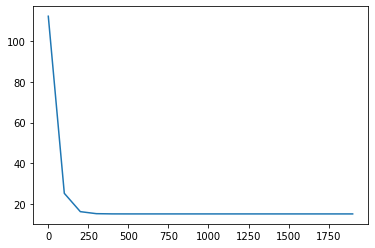

In [210]:
# 学習曲線の表示 (最初の10個分を除く)
plt.plot(history[:,0], history[:,1])
plt.show()